# Use Case 1: Molecular Correlation Comparison

<b>This use case will guide you through basic features of our package, including importing the data, interacting with the dataframes, and producing a basic scatterplot comparing proteomics and transcriptomics for a given gene. We will begin by importing standard data analysis libraries.</b>

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

<b>Next, we will import the CPTAC package. This includes both data on endometrial cancer patients and functions that will allow the user to access and perform basic operations on the data.</b>

In [2]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


<b>Now that the package is imported, we can begin to extract the data we need. In this case, we need the proteomics and transcriptomics data for the endometrial cancer patients. For a full list of available data and functions, enter <code>CPTAC.help()</code>. This will bring you to the documentation on our website.</b>

In [3]:
proteomics = CPTAC.get_proteomics()
transcriptomics = CPTAC.get_transcriptomics()

<b>You can use the <code>CPTAC.compare_gene()</code> function to join two data frames on a common gene (an array of genes can also be passed to this function). All entries for that gene that do not exist simultaneously in both dataframes will be discarded.</b>

In [4]:
cross = CPTAC.compare_gene(proteomics, transcriptomics, 'A1BG')

<b>Finally, we will plot the transcriptomics data against the proteomics data. We use the Seaborn library for our tutorials, but you can get the same results using matplotlib.pyplot instead.</b>

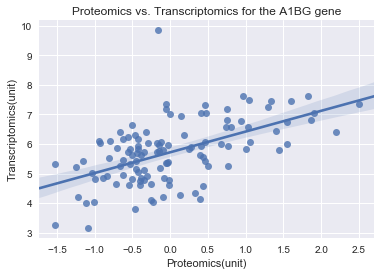

In [7]:
sns.set(style="darkgrid")
plot = sns.regplot(x="proteomics", y="transcriptomics", data=cross)
plot.set_title("Proteomics vs. Transcriptomics for the A1BG gene")
plot.set(xlabel="Proteomics(unit)",ylabel="Transcriptomics(unit)")
plt.show()

<b>For comparison, we can plot another gene with a different correlation</b>

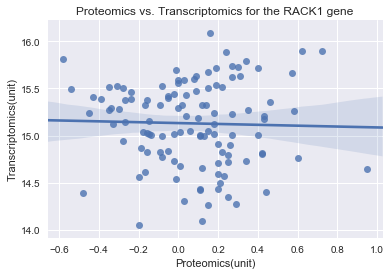

In [8]:
cross2 = CPTAC.compare_gene(proteomics, transcriptomics, 'RACK1')
plot = sns.regplot(x="proteomics", y="transcriptomics", data=cross2)
plot.set_title("Proteomics vs. Transcriptomics for the RACK1 gene")
plot.set(xlabel="Proteomics(unit)",ylabel="Transcriptomics(unit)")
plt.show()